# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [44]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

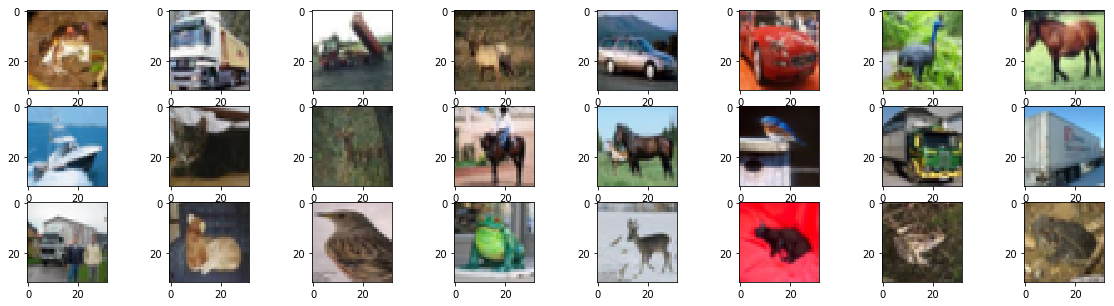

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(3, 8, i+1)
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [46]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [47]:
from keras.utils import np_utils

num_classes=len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model 

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 7. Train the Model 

In [34]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mlp.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=2, callbacks=[checkpointer],
                validation_data=(x_valid , y_valid), shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 24s - loss: 5.0368 - acc: 0.2017 - val_loss: 1.8785 - val_acc: 0.3192

Epoch 00001: val_loss improved from inf to 1.87851, saving model to mlp.model.weights.best.hdf5
Epoch 2/10
 - 23s - loss: 1.8859 - acc: 0.3174 - val_loss: 1.8041 - val_acc: 0.3498

Epoch 00002: val_loss improved from 1.87851 to 1.80407, saving model to mlp.model.weights.best.hdf5
Epoch 3/10
 - 25s - loss: 1.7919 - acc: 0.3557 - val_loss: 1.8359 - val_acc: 0.3230

Epoch 00003: val_loss did not improve from 1.80407
Epoch 4/10
 - 33s - loss: 1.7294 - acc: 0.3801 - val_loss: 1.6907 - val_acc: 0.3928

Epoch 00004: val_loss improved from 1.80407 to 1.69070, saving model to mlp.model.weights.best.hdf5
Epoch 5/10
 - 34s - loss: 1.6931 - acc: 0.3966 - val_loss: 1.6753 - val_acc: 0.4110

Epoch 00005: val_loss improved from 1.69070 to 1.67529, saving model to mlp.model.weights.best.hdf5
Epoch 6/10
 - 30s - loss: 1.6587 - acc: 0.4060 - val_loss: 1.6046 - val_acc: 0.

### 8. Load the Model with the Best Classification Accuracy on the Validation Set

In [35]:
model.load_weights('mlp.model.weights.best.mine.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [39]:
y_test.shape

(10000, 10)

In [48]:
score = model.evaluate(x_test, y_test)
print(score[1])

10000/10000 [==============================] - 1s 104us/step
0.4539
